# <center >Data Science with Python 
## <center >Statistical and Data Techniques in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or `customers.csv` in the folder attached ).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
# Write your code from here, add more cells if needed
data = pd.read_csv('customers.csv')
# Check the data head
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185

In [2]:
# Check the data shape
data.shape

(440, 8)

In [3]:
# Check the data type
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

In [4]:
# Check the data columns
data.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [5]:
# Convert columns excluding 'Channel' and 'Region' to floats if necessary

In [6]:
# Drop out 'Channel','Region' 'Frozen', 'Detergents_Paper', 'Delicatessen' as they will not be used
data.drop(columns=['Channel', 'Region', 'Frozen', 'Detergents_Paper', 'Delicatessen'], inplace=True)
data.head()

Fresh  Milk  Grocery
0  12669  9656     7561
1   7057  9810     9568
2   6353  8808     7684
3  13265  1196     4221
4  22615  5410     7198

### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.
 

In [7]:
# Calculate the min, Q1 (i.e., 25%), median, , Q3(i.e.,75%), max of the annual spending on grocery products
min_num = np.min(data['Grocery'])
min_num

3

In [8]:
Q1 = np.percentile(data['Grocery'],25)
Q1

2153.0

In [9]:
median = np.median(data['Grocery'])
median

4755.5

In [10]:
Q3 = np.percentile(data['Grocery'], 75)
Q3

10655.75

In [11]:
max_num = np.max(data['Grocery'])
max_num

92780

In [12]:
# Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products
mean = np.mean(data['Grocery'])
mean

7951.277272727273

In [13]:
range_num = max_num - min_num
range_num

92777

In [14]:
std = np.std(data['Grocery'])
std

9492.35763751948

In [15]:
skew = ss.skew(data['Grocery'])
skew

3.5751872200807875

In [16]:
kurt = ss.kurtosis(data['Grocery'])
kurt

20.664153228293365

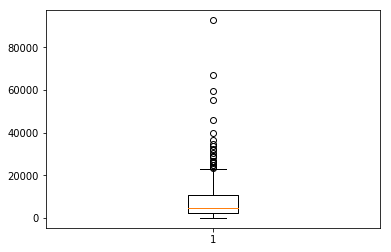

In [17]:
# Make a boxplot of the annual spending on grocery products.
plt.boxplot(data['Grocery'])
plt.show()

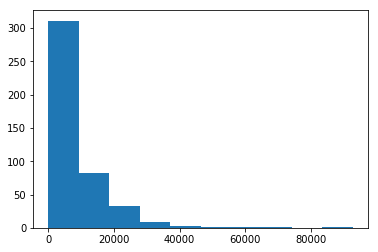

In [18]:
# Make a histogram of the annual spending on grocery products.
plt.hist(data['Grocery'])
plt.show()

### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

In [19]:
# Calculate the correlation of 'Grocery' and 'Milk'.
np.corrcoef(data['Grocery'], data['Milk'])

array([[1.        , 0.72833512],
       [0.72833512, 1.        ]])

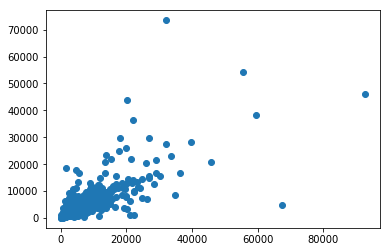

In [20]:
# Make a scatter plot of 'Grocery' and 'Milk'
plt.scatter(data['Grocery'], data['Milk'])
plt.show()

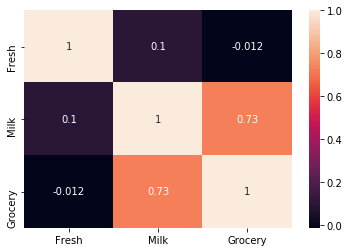

In [21]:
# Make a heatmap of features together
sns.heatmap(data.corr(), annot=True)

### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [22]:
# Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk')
ss.pearsonr(data['Grocery'], data['Milk'])

(0.7283351181536448, 6.480570788053402e-74)

In [23]:
ss.pearsonr(data['Grocery'], data['Fresh'])

(-0.011853874984010514, 0.8041728013490431)

In [24]:
ss.pearsonr(data['Fresh'], data['Milk'])

(0.1005097682998585, 0.03506100703784227)

### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002350BD46940>,
      dtype=object)

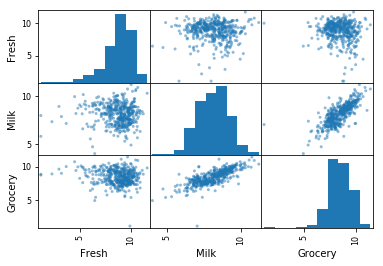

In [29]:
# Transform the data by using np.log and set the new data as the name 'log_data', then visualize this data by using pd.scatter_matrix
log_data = np.log(data)
pd.plotting.scatter_matrix(log_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002350CB8E160>,
      dtype=object)

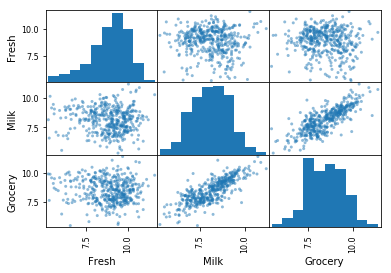

In [41]:
# Remove outliers of each features of 'log_data' whose are out of the fencies " Q1−IQR∗1.5 " and " Q3+IQR∗1.5 ", 
# set the new data by the name 'good_log_data' then visualize this data
outliers = []
for num in "Fresh", "Milk", "Grocery":
    Q1 = np.percentile(log_data, 25)
    Q3 = np.percentile(log_data, 75)
    step = (Q3 - Q1) * 1.5
    item = log_data[~((log_data[num] >= Q1 - step) & (log_data[num] <= Q3 + step))]
    outliers += item.index.tolist()
good_log_data = log_data.drop(data.index[outliers]).reset_index(drop = True)
pd.plotting.scatter_matrix(good_log_data)

### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [43]:
# Write your answer from here, add more cells if needed
import statistics as sta
import math
z=log_data['Fresh']
t=(np.mean(z)-8.8)*math.sqrt(len(z))/sta.stdev(z)
ss.ttest_1samp(log_data['Fresh'],8.7)

Ttest_1sampResult(statistic=0.432882658823101, pvalue=0.665312608653697)

In [45]:
z=good_log_data['Fresh']
print(np.mean(z))
t=(np.mean(z)-8.8)*math.sqrt(len(z))/sta.stdev(z)
ss.ttest_1samp(log_data['Fresh'],8.8)

8.872939615192704


Ttest_1sampResult(statistic=-0.9843582884850726, pvalue=0.3254815721715403)

In [46]:
ss.ttest_ind(log_data['Fresh'],good_log_data['Fresh'])

Ttest_indResult(statistic=-1.5521753267145781, pvalue=0.12098690344404678)

In [47]:
ss.ttest_ind(log_data['Milk'],good_log_data['Milk'])

Ttest_indResult(statistic=-0.3648856925655868, pvalue=0.7152861329749802)